In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load data
df_train = pd.read_csv("../data/processed/train.csv")
df_val = pd.read_csv("../data/processed/val.csv")
df_test = pd.read_csv("../data/processed/test.csv")

raw_df_train = pd.read_csv("../data/raw/kaggle/train.csv")
raw_df_test = pd.read_csv("../data/raw/kaggle/test.csv")
raw_df_test_labels = pd.read_csv("../data/raw/kaggle/test_labels.csv")
raw_df_test = raw_df_test.merge(raw_df_test_labels, on="id", how="left")
df_raw = pd.concat([df_train, df_test]).rename(columns={"comment_text": "text"})

In [4]:
# Size of the raw dataset
raw_df_train.shape[0] + raw_df_test.shape[0]

312735

In [9]:
print(df_train.shape)
print(df_val.shape)
print(df_test.shape)

(178839, 3)
(22355, 2)
(22355, 2)


In [5]:
# Ratio of toxic comments in the raw dataset
print(df_raw.value_counts("toxic")[1]/df_raw.shape[0])

0.10049007425668757


In [6]:
# Ratio of toxic comments in the processed dataset
print(df_train.value_counts("toxic")[1]/df_train.shape[0])
print(df_val.value_counts("toxic")[1]/df_val.shape[0])
print(df_test.value_counts("toxic")[1]/df_test.shape[0])

0.1003360564530108
0.10064862446879892
0.10172220979646611


In [7]:
# Add number of tokens
df_train["len"] = df_train["text"].apply(lambda x: len(str(x).split()))

In [8]:
# Mean of number of tokens
df_train["len"].mean()

64.6038280240887

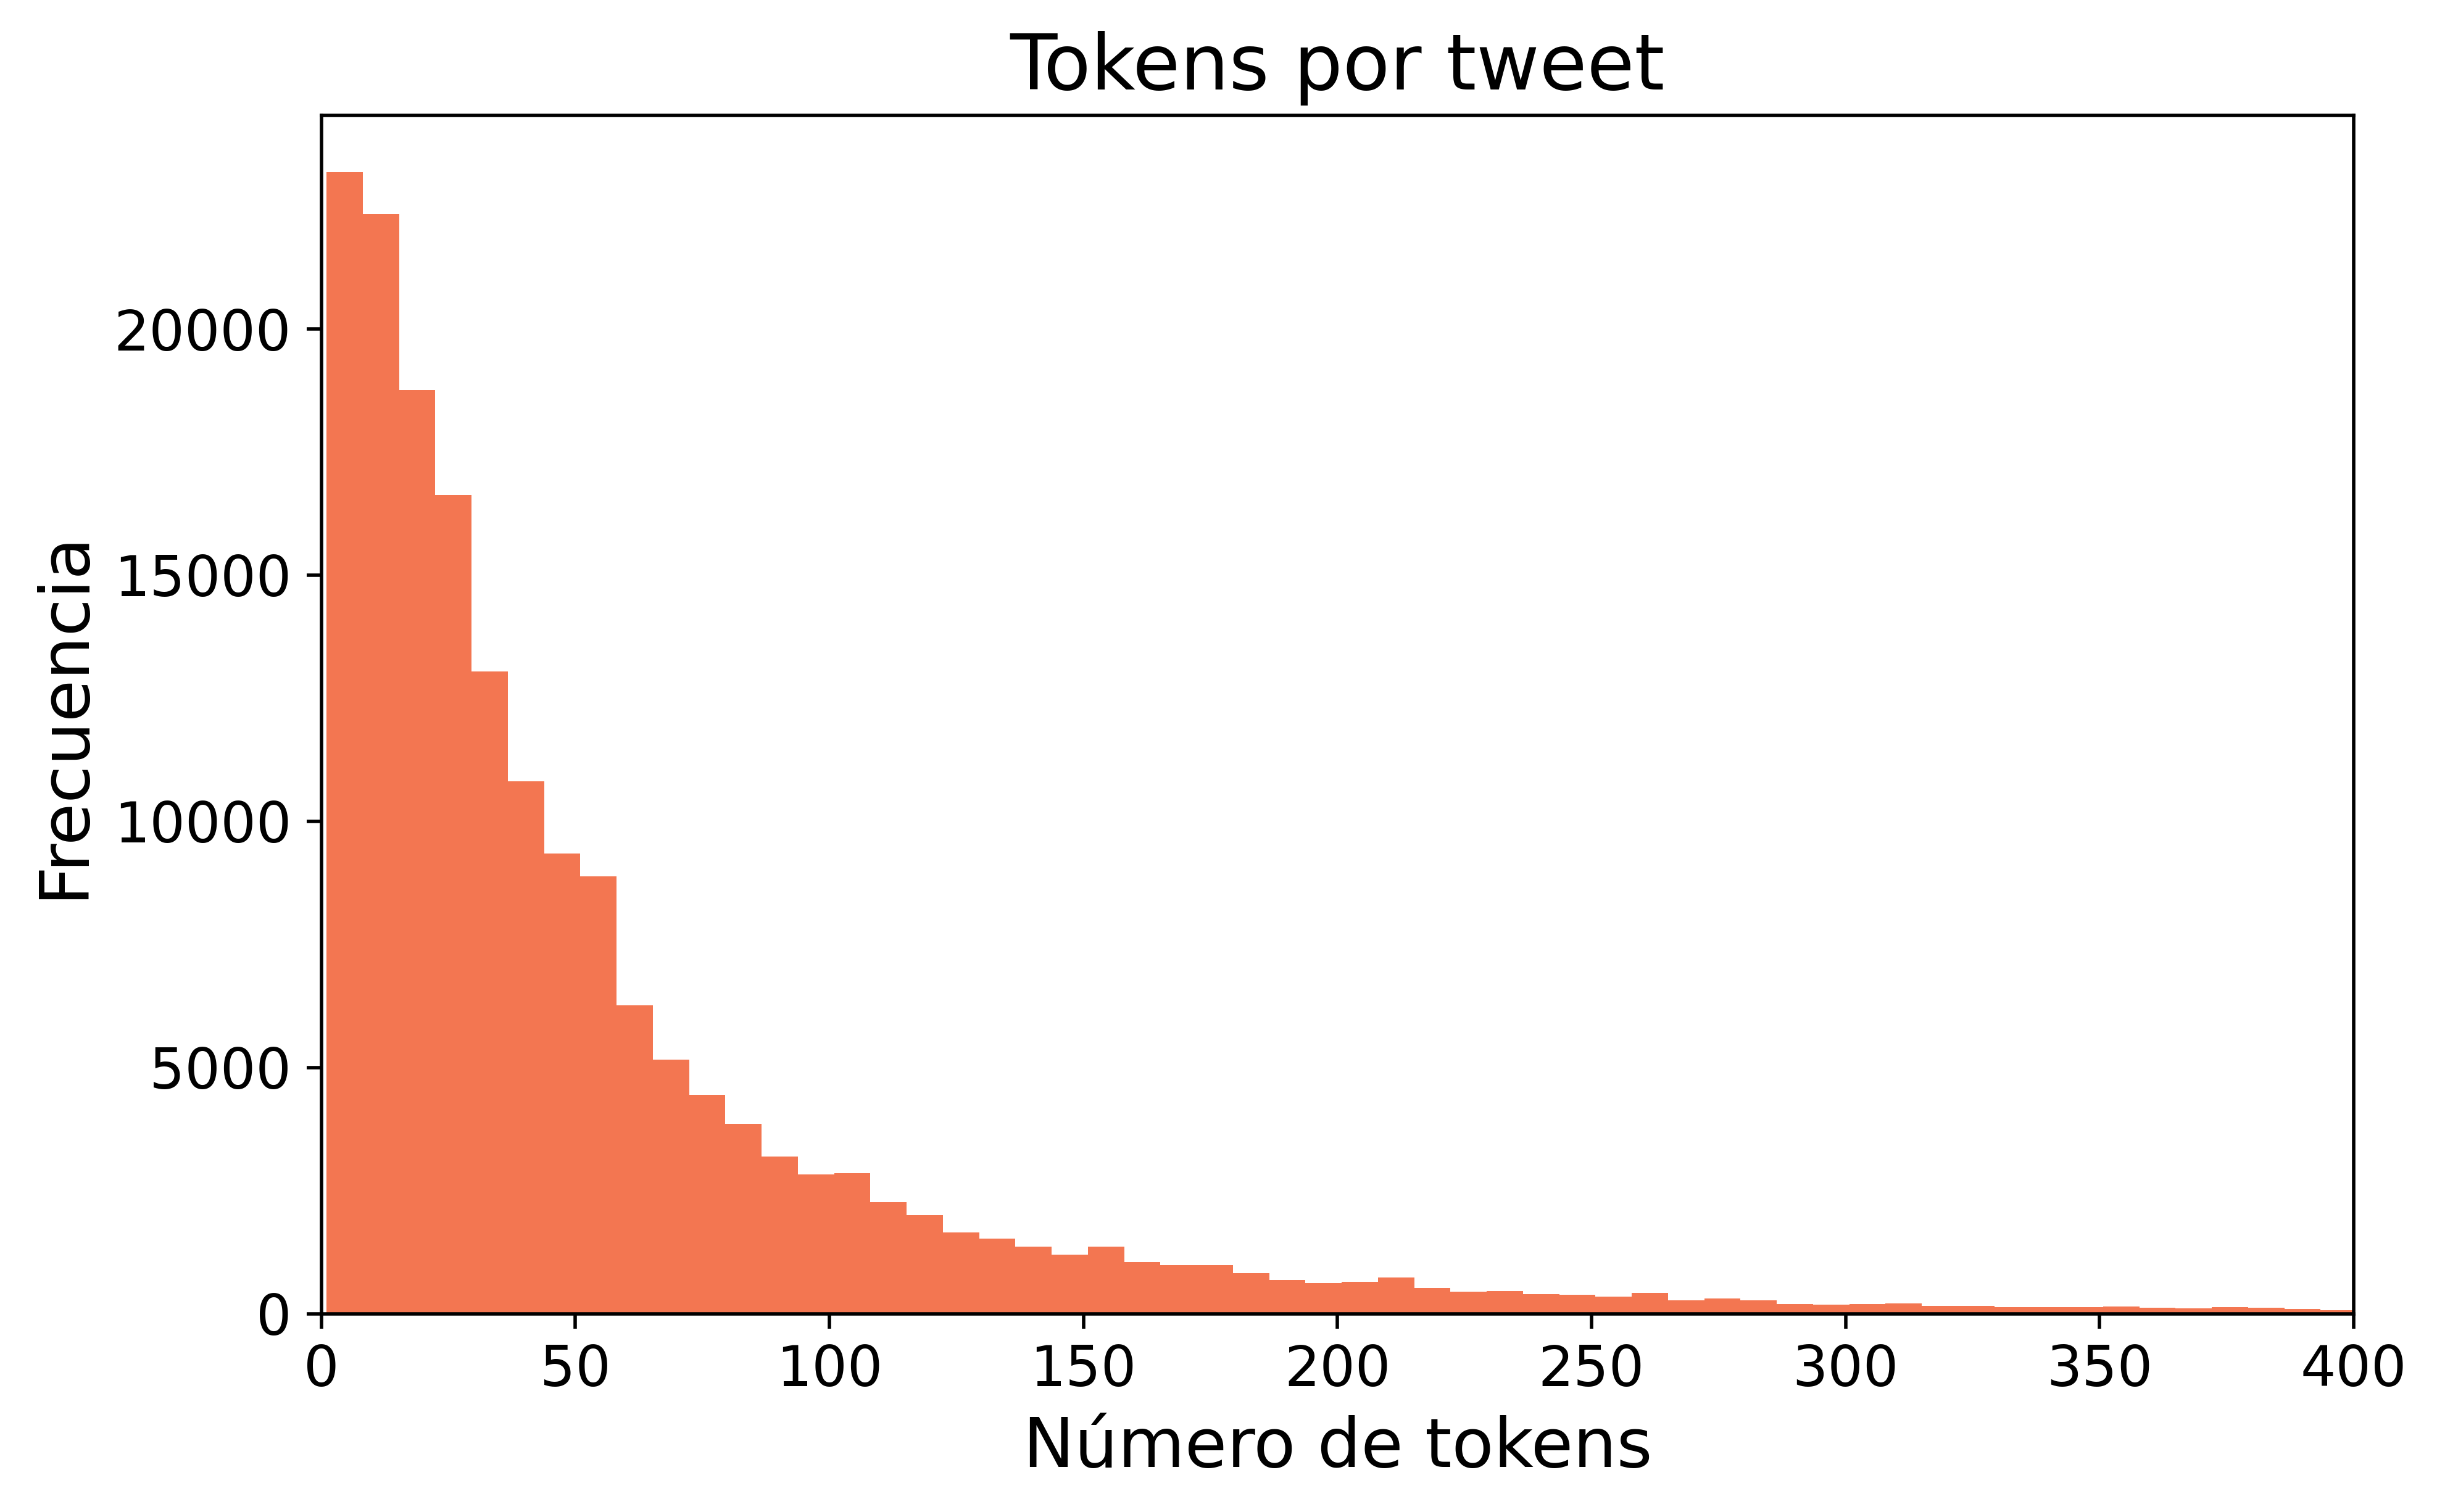

In [155]:
# Número de tokens por tweet
plt.figure(figsize=(8,5), tight_layout=False, dpi=500)
plt.xlim(0, 400)
plt.hist(df_train["len"], bins=300, color=sns.color_palette('rocket')[4])
plt.xlabel("Número de tokens", fontsize=16)
plt.ylabel("Frecuencia", fontsize=16)
plt.title("Tokens por tweet", fontsize=18)
plt.tick_params(axis='both', labelsize=13)
plt.savefig("../docs/paper/tokens.png", dpi=1000)
plt.show()